***
*Course:* [Math 535](https://people.math.wisc.edu/~roch/mmids/) - Mathematical Methods in Data Science (MMiDS)  
*Author:* [Sebastien Roch](https://people.math.wisc.edu/~roch/), Department of Mathematics, University of Wisconsin-Madison  
*Updated:* Jan. 25, 2023
*Copyright:* &copy; 2022 Sebastien Roch
***
Updated by Hanbaek Lyu 

# Chapter 1 - Introduction and review

## 1.2 Review++

We first review a few basic mathematical concepts. In this chapter, we focus on vector and matrix algebra, some basic calculus and optimization, as well as elementary probability concepts. Further mathematical concepts will be reviewed in the next chapters. Along the way, we also introduce Python, especially Numpy. 

### 1.2.1 Vectors and matrices

**Vectors and norms** For a vector 

$$
\mathbf{x} 
= 
\begin{bmatrix}
x_1 \\
x_2 \\
\vdots \\
x_d
\end{bmatrix}
\in \mathbb{R}^d
$$

the Euclidean norm of $\mathbf{x}$ is defined as

$$
\|\mathbf{x}\|_2 
= 
\sqrt{
\sum_{i=1}^d x_i^2
} 
= 
\sqrt{\langle \mathbf{x}, \mathbf{x}\rangle}
$$

where

$$
\langle \mathbf{u}, \mathbf{v} \rangle = \sum_{i=1}^d u_i v_i
$$ 

is the [inner product](https://en.wikipedia.org/wiki/Inner_product_space) of $\mathbf{u}$ and $\mathbf{v}$.
This is also known as the $\ell^2$-norm. 

The triangle inequality for the $\ell^2$-norm [follows](https://en.wikipedia.org/wiki/Cauchy–Schwarz_inequality#Analysis) from the [Cauchy–Schwarz inequality](https://en.wikipedia.org/wiki/Cauchy–Schwarz_inequality), which is useful in proving many facts.

***
**Theorem (Cauchy–Schwarz):** For all $\mathbf{u}, \mathbf{v} \in \mathbb{R}^d$

$$
|\langle \mathbf{u}, \mathbf{v} \rangle| 
\leq \|\mathbf{u}\|_2 \|\mathbf{v}\|_2.
$$
***

Given a collection of vectors $\mathbf{u}_1,\ldots,\mathbf{u}_k \in \mathbb{R}^d$ and real numbers $\alpha_1,\ldots,\alpha_k \in \mathbb{R}$, the linear combination of $\mathbf{u}_\ell$'s with coefficients $\alpha_\ell$'s is the vector

$$
\mathbf{z} 
= \sum_{\ell=1}^k \alpha_\ell \mathbf{u}_\ell,
$$

whose entries are

$$
z_i
= \sum_{\ell=1}^k \alpha_\ell (\mathbf{u}_\ell)_i, \quad i=1,\ldots,d.
$$

The [Euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance) between two vectors $\mathbf{u}$ and $\mathbf{v}$ in $\mathbb{R}^d$ is the $2$-norm of their difference

$$
d(\mathbf{u},\mathbf{v})
= \|\mathbf{u} - \mathbf{v}\|_2.
$$

Throughout we use the notation $\|\mathbf{x}\| = \|\mathbf{x}\|_2$ to indicate the $2$-norm of $\mathbf{x}$ unless specified otherwise.

More generally, for $p \geq 1$, the [$\ell^p$-norm](https://en.wikipedia.org/wiki/Lp_space#The_p-norm_in_countably_infinite_dimensions_and_ℓ_p_spaces) of $\mathbf{x}$ is given by

$$
\|\mathbf{x}\|_p 
= 
\left(
\sum_{i=1}^d |x_i|^p
\right)^{1/p}.
$$

[Here](https://commons.wikimedia.org/wiki/File:Lp_space_animation.gif#/media/File:Lp_space_animation.gif) is a nice visualization of the unit ball, that is, the set $\{\mathbf{x}:\|x\|_p \leq 1\}$, under varying $p$. 

Finally the $\ell^\infty$-norm, is defined as 


$$
\|\mathbf{x}\|_\infty = \max_{i=1,\ldots,d}|x_i|.
$$

There exist other norms. Formally: 

**Definition (Norm):** A norm is a function $\ell$ from $\mathbb{R}^d$ to $\mathbb{R}_+$ that satisfies for all $a \in \mathbb{R}$,
$\mathbf{u}, \mathbf{v} \in \mathbb{R}^d$

- *(Homogeneity):* $\ell(a \mathbf{u}) = |a| \ell(\mathbf{u})$
- *(Triangle inequality):* $\ell(\mathbf{u}+\mathbf{v}) \leq \ell(\mathbf{u}) + \ell(\mathbf{v})$
- *(Point-separating):* $\ell(\mathbf{u}) = 0$ implies $\mathbf{u} =0$.

$\lhd$

**NUMERICAL CORNER:** In Numpy, a vector is defined as a 1d array.

In [1]:
# Python 3
import numpy as np

In [2]:
u = np.array([1., 3., 5. ,7.])
print(u)

[1. 3. 5. 7.]


To obtain the norm of a vector, we can use the function [`linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) (which requires the `numpy.linalg` package):

In [3]:
from numpy import linalg as LA

In [4]:
LA.norm(u)

9.16515138991168

which we check next "by hand"

In [5]:
np.sqrt(np.sum(u ** 2))

9.16515138991168

In Numpy, [`**`](https://numpy.org/doc/stable/reference/generated/numpy.power.html) indicates element-wise exponentiation.

$\lhd$

**Matrices** For an $n \times m$ matrix $A \in \mathbb{R}^{n \times m}$ with real entries, we denote by $A_{ij}$ its entry in row $i$ and column $j$. We also refer to a matrix as the collection of all of its entries as follows 

$$
A = (A_{ij})_{i\in [n],j \in [m]}.
$$

We occasionally simplify the notation to $(A_{ij})_{i,j}$ when the range of the indices is clear from context. We use the notation 

$$
A_{i,\cdot} = (A_{i1} \cdots A_{im}),
$$ 

to indicate the $i$-th row of $A$ - as a row vector, i.e., a matrix with a single row - and similarly 

$$
A_{\cdot,j} = \begin{pmatrix}
A_{1j}\\
\vdots\\
A_{nj}
\end{pmatrix},
$$ 

the $j$-th column of $A$ - as a column vector, i.e., a matrix with a single column. 

**Example:** Suppose

$$
A 
= \begin{bmatrix}
2 & 5\\
3 & 6\\
1 & 1
\end{bmatrix}.
$$

Then the second row is

$$
A_{2,\cdot} = \begin{bmatrix}
3 & 6
\end{bmatrix},
$$

and the second column is

$$
A_{\cdot,2} 
= \begin{bmatrix}
5\\
6\\
1
\end{bmatrix}.
$$

$\lhd$

Recall that the [transpose](https://en.wikipedia.org/wiki/Transpose) $A^T$ of a matrix $A \in \mathbb{R}^{n\times m}$ is defined as the matrix in $\mathbb{R}^{m\times n}$ that switches the row and column indices of $A$, that is, its entries are

$$
[A^T]_{ij} = A_{ji},\quad i=1,\ldots,m, j=1,\ldots,n.
$$

Visually:

![transpose](https://upload.wikimedia.org/wikipedia/commons/e/e4/Matrix_transpose.gif)

([Source](https://commons.wikimedia.org/wiki/File:Matrix_transpose.gif))

The transpose in particular can be used to turn a column vector into a row vector and vice versa. That is, if $\mathbf{x} \in \mathbb{R}^n$ is a column vector

$$
\mathbf{b} 
= \begin{bmatrix}
b_1\\
b_2\\
\vdots\\
b_n
\end{bmatrix},
$$

then $\mathbf{b}^T$ is the corresponding row vector

$$
\mathbf{b}^T 
= \begin{bmatrix}
b_1 &
b_2 &
\cdots &
b_n
\end{bmatrix}.
$$

For instance, $\sqrt{\mathbf{b}^T \mathbf{b}}$ is the Euclidean norm of $\mathbf{b}$.

**NUMERICAL CORNER:** We will often work with collections of $n$ vectors $\mathbf{x}_1, \ldots, \mathbf{x}_n$ in $\mathbb{R}^d$ and it will be convenient to stack them up into a matrix

$$
X =
\begin{bmatrix}
\mathbf{x}_1^T \\
\mathbf{x}_2^T \\
\vdots \\
\mathbf{x}_n^T \\
\end{bmatrix}
=
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1d} \\
x_{21} & x_{22} & \cdots & x_{2d} \\
\vdots & \vdots & \ddots & \vdots \\
x_{n1} & x_{n2} & \cdots & x_{nd} \\
\end{bmatrix}.
$$

To create a matrix out of two vectors, we use the function [`numpy.stack`](https://numpy.org/doc/stable/reference/generated/numpy.stack.html).

In [6]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
X = np.stack((u,v),axis=0)
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]]


Quoting the documentation:

> The axis parameter specifies the index of the new axis in the dimensions of the result. For example, if axis=0 it will be the first dimension and if axis=-1 it will be the last dimension.

The same scheme still works with more than two vectors.

In [7]:
u = np.array([1., 3., 5., 7.])
v = np.array([2., 4., 6., 8.])
w = np.array([9., 8., 7., 6.])
X = np.stack((u,v,w))
print(X)

[[1. 3. 5. 7.]
 [2. 4. 6. 8.]
 [9. 8. 7. 6.]]


$\lhd$

**Matrix-vector product** Recall that, for a matrix $A = (A_{ij})_{i\in [n],j \in [m]} \in \mathbb{R}^{n \times m}$ and a column vector $\mathbf{b} = (b_{i})_{i\in [m]} \in \mathbb{R}^{m}$, the matrix-vector product $\mathbf{c} = A \mathbf{b}$ is the vector with entries

$$
c_i = (A\mathbf{b})_i = \sum_{j=1}^m A_{ij} b_j.
$$

In vector form, 

$$
A \mathbf{b} = \sum_{j=1}^m A_{\cdot,j} b_j,
$$

that is, $A \mathbf{b}$ is a linear combination of the columns of $A$ where the coefficients are the entries of $\mathbf{b}$.

**Example (continued):** Consider the column vector $\mathbf{b} = (1, 0)^T$. Then

$$
A \mathbf{b} 
= \begin{bmatrix}
2(1) + 5(0)\\
3(1) + 6(0)\\
1(1) + 1(0)
\end{bmatrix}
= \begin{bmatrix}
2\\
3\\
1
\end{bmatrix},
$$

which can also be written in vector form as

$$
(1) \begin{bmatrix}
2\\
3\\
1
\end{bmatrix}
+
(0) \begin{bmatrix}
5\\
6\\
1
\end{bmatrix}
= \begin{bmatrix}
2\\
3\\
1
\end{bmatrix}.
$$

$\lhd$

**Matrix-matrix product** Recall that, for matrices $A \in \mathbb{R}^{n \times k}$ and $B \in \mathbb{R}^{k \times m}$, their matrix product is defined as the matrix $C = AB \in \mathbb{R}^{n \times m}$ whose entries are

$$
C_{i\ell} = (AB)_{i\ell} = \sum_{j=1}^k A_{ij} B_{j\ell}, \qquad \ell=1,\ldots,m.
$$

Note that the number of columns of $A$ and the number of rows of $B$ must match. There are many different ways to view this formula that are helpful in interpreting matrix-matrix products in different contexts. 

First, we observe that the entry $C_{i\ell}$ is an inner product of the $i$-th row of $A$ and of the $\ell$-th column of $B$. That is,

$$
C_{i\ell} = A_{i,\cdot} B_{\cdot,\ell}.
$$

In matrix form,

$$
AB = \begin{bmatrix}
A_{1,\cdot} B_{\cdot,1} & A_{1,\cdot} B_{\cdot,2} & \cdots & A_{1,\cdot} B_{\cdot,m} \\
A_{2,\cdot} B_{\cdot,1} & A_{2,\cdot} B_{\cdot,2} & \cdots & A_{2,\cdot} B_{\cdot,m} \\
\vdots & \vdots & \ddots & \vdots\\
A_{n,\cdot} B_{\cdot,1} & A_{n,\cdot} B_{\cdot,2} & \cdots & A_{n,\cdot} B_{\cdot,m}
\end{bmatrix}.
$$

Alternatively, the previous display can be re-written as 

$$
AB
= 
\begin{bmatrix}
A (B_{\cdot,1}) & A (B_{\cdot,2}) & \cdots & A (B_{\cdot,m})
\end{bmatrix},
$$

where we specify a matrix by the collection of its columns. 

Put differently, by the matrix-vector product formula above, the $j$-th column of the product $AB$ is a linear combination of the columns of $A$ where the coefficients are the entries in column $j$ of $B$

$$
(AB)_{\cdot,j} 
= A B_{\cdot,j}
= \sum_{\ell=1}^k A_{\cdot,\ell} B_{\ell j}.
$$

Similarly, the $i$-th row of the product $AB$ is a linear combination of the rows of $B$ where the coefficients are the entries in row $i$ of $A$

$$
(AB)_{i,\cdot} = \sum_{\ell=1}^k A_{i\ell} B_{\ell,\cdot}.
$$

Writing $AB$ as the collection of its rows, this is

$$
AB
= \begin{bmatrix}
A_{1,\cdot} B\\
A_{2,\cdot} B\\
\vdots\\
A_{n,\cdot} B
\end{bmatrix},
$$

where recall that $A_{i,\cdot}$ is a row vector.

**Matrix norms** We will also need a notion of matrix norm. A natural way to define a norm for matrices is to notice that an $n \times m$ matrix $A$ can be thought of as an $nm$ vector, with one element for each entry of $A$. Indeed, addition and scalar multiplication work exactly in the same way. Hence, we can define the $2$-norm of a matrix in terms of the sum of its squared entries. (We will encounter other matrix norms later in the course.)

**Definition (Frobenius Norm):** The Frobenius norm of an $n \times m$ matrix $A \in \mathbb{R}^{n \times m}$ is defined as

$$
\|A\|_F
= \sqrt{\sum_{i=1}^n \sum_{j=1}^m A_{ij}^2}.
$$

$\lhd$

Using the row notation, we see that the square of the Frobenius norm can be written as the sum of the squared Euclidean norms of the rows
 
$$
\|A\|_F^2 = \sum_{i=1}^n \|A_{i,\cdot}\|_2^2.
$$

Similarly in terms of the columns $A_{\cdot,j}$, $j=1,\ldots,m$, of $A$ we have
$\|A\|_F^2 = \sum_{j=1}^m \|A_{\cdot,j}\|_2^2$.

For two matrices $A, B \in \mathbb{R}^{n \times m}$, the Frobenius norm of their difference $\|A - B\|_F$ can be interpreted as a distance between $A$ and $B$, that is, a measure of how dissimilar they are.

**NUMERICAL CORNER:** In Numpy, the Frobenius norm of a matrix can be computed using the function [`numpy.linalg.norm`](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html).

In [8]:
A = np.array([[1., 0.],[0., 1.],[0., 0.]])
print(A)

[[1. 0.]
 [0. 1.]
 [0. 0.]]


In [9]:
LA.norm(A)

1.4142135623730951

$\lhd$

### 1.2.2 Differential calculus

Next, we review some basic concepts from differential calculus. We focus here on definitions and results relevant to optimization theory, which plays a central role in data science.

#### 1.2.2.1 Limits and continuity

Throughout this section, we use the Euclidean norm $\|\mathbf{x}\| = \sqrt{\sum_{i=1}^d x_i^2}$ for $\mathbf{x} = (x_1,\ldots, x_d)^T \in \mathbb{R}^d$.

The open $r$-ball around $\mathbf{x} \in \mathbb{R}^d$ is the set of points within Euclidean distance $r$ of $\mathbf{x}$, that is,

$$
B_r(\mathbf{x}) = \{\mathbf{y}  \in \mathbb{R}^d \,:\, \|\mathbf{y} - \mathbf{x}\| < r\}.
$$

A point $\mathbf{x} \in \mathbb{R}^d$ is a limit point (or accumulation point) of a set $A \subseteq \mathbb{R}^d$ if every open ball around $\mathbf{x}$ contains an element $\mathbf{a}$ of $A$ such that $\mathbf{a} \neq \mathbf{x}$. A set $A$ is [closed](https://en.wikipedia.org/wiki/Closed_set) if every limit point of $A$ belongs to $A$.

![limit point](https://1.bp.blogspot.com/-hc5TCEO6Sdo/WkBJtvWoTvI/AAAAAAAAALg/noT83CnNSxQ30_W4xDivMOIMS1Y9k6YHACLcBGAs/s1600/topological_space_accum%2B%25281%2529.png)

([Source](https://www.math212.com/2017/12/limit-point-closure.html))

A point $\mathbf{x} \in \mathbb{R}^d$ is an interior point of a set $A \subseteq \mathbb{R}^d$ if there exists an $r > 0$ such that $B_r(\mathbf{x}) \subseteq A$.
A set $A$ is [open](https://en.wikipedia.org/wiki/Open_set) if it consists entirely of interior points.

![Open set](https://upload.wikimedia.org/wikipedia/commons/thumb/d/de/Open_set_-_example.png/320px-Open_set_-_example.png)

([Source](https://commons.wikimedia.org/wiki/File:Open_set_-_example.png))

A set $A \subseteq \mathbb{R}^d$ is bounded if there exists an $r > 0$ such that $A \subseteq B_r(\mathbf{0})$, where $\mathbf{0} = (0,\ldots,0)^T$.

**Definition (Limits of a Function):** Let $f: D \to \mathbb{R}$ be a real-valued function on $D \subseteq \mathbb{R}^d$. Then $f$ is said to have a limit $L \in \mathbb{R}$ as $\mathbf{x}$ approaches $\mathbf{a}$ if: for any $\varepsilon > 0$, there exists a $\delta > 0$ such that $|f(\mathbf{x}) - L| < \varepsilon$ for all $\mathbf{x} \in D \cap B_\delta(\mathbf{a})\setminus \{\mathbf{a}\}$. This is written as 

$$
\lim_{\mathbf{x} \to \mathbf{a}} f(\mathbf{x}) = L.
$$

$\lhd$

![Limit of a function](http://tutorial.math.lamar.edu/Classes/CalcI/TheLimit_Files/image002.png)

([Source](https://tutorial.math.lamar.edu/Classes/CalcI/TheLimit.aspx))

Note that we explicitly exclude $\mathbf{a}$ itself from having to satisfy the condition $|f(\mathbf{x}) - L| < \varepsilon$. In particular, we may have $f(\mathbf{a}) \neq L$. We also do not restrict $\mathbf{a}$ to be in $D$.

**Definition (Continuous Function):** Let $f: D \to \mathbb{R}$ be a real-valued function on $D \subseteq \mathbb{R}^d$. Then $f$ is said to be continuous at $\mathbf{a} \in D$ if 

$$
\lim_{\mathbf{x} \to \mathbf{a}} f(\mathbf{x}) = f(\mathbf{a}).
$$

$\lhd$

![Continuous function](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7f/Example_of_continuous_function.svg/232px-Example_of_continuous_function.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:Example_of_continuous_function.svg))

We will not prove the following fundamental analysis result, which will be used repeatedly in this course. (See e.g. [Wikipedia](https://en.wikipedia.org/wiki/Extreme_value_theorem) for a sketch of the proof.) Suppose $f : D \to \mathbb{R}$ is defined on a set $D \subseteq \mathbb{R}^d$. We say that $f$ attains a maximum value $M$ at $\mathbf{z}^*$ if $f(\mathbf{z}^*) = M$ and $M \geq f(\mathbf{x})$ for all $\mathbf{x} \in D$. Similarly, we say $f$ attains a minimum value $m$ at $\mathbf{z}_*$ if $f(\mathbf{z}_*) = m$ and $m \geq f(\mathbf{x})$ for all $\mathbf{x} \in D$.

***

**Theorem (Extreme Value):** Let $f : D \to \mathbb{R}$ be a real-valued, continuous function on a nonempty, closed, bounded set $D\subseteq \mathbb{R}^d$. Then $f$ attains a maximum and a minimum on $D$. 


***

#### 1.2.2.2 Derivatives

We move on to derivatives. Recall that the derivative of a function of a real variable is the rate of change of the function with respect to the change in the variable. Formally:

**Definition (Derivative):** Let $f : D \to \mathbb{R}$ where $D \subseteq \mathbb{R}$ and let $x_0 \in D$ be an interior point of $D$. The derivative of $f$ at $x_0$ is 

$$
f'(x_0) 
= \frac{\mathrm{d} f (x_0)}{\mathrm{d} x}
= \lim_{h \to 0} \frac{f(x_0 + h) - f(x_0)}{h}
$$

provided the limit exists. $\lhd$

![Derivative](https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Tangent_to_a_curve.svg/320px-Tangent_to_a_curve.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:Tangent_to_a_curve.svg))

The following lemma encapsulates a key insight about the derivative of $f$ at $x_0$: it tells us where to find smaller values.

***

**Lemma (Descent Direction):** Let $f : D \to \mathbb{R}$ with $D \subseteq \mathbb{R}$ and let $x_0 \in D$ be an interior point of $D$ where $f'(x_0)$ exists. If $f'(x_0) > 0$, then there is an open ball $B_\delta(x_0) \subseteq D$ around $x_0$
such that for each $x$ in $B_\delta(x_0)$:

(a) $f(x) > f(x_0)$ if $x > x_0$,
(b) $f(x) < f(x_0)$ if $x < x_0$.

If instead $f'(x_0) < 0$, the opposite holds.

***

*Proof idea:* Follows from the definition of the derivative by taking $\varepsilon$ small enough that $f'(x_0) - \varepsilon > 0$.

*Proof:* Take $\varepsilon = f'(x_0)/2$. By definition of the derivative, there is $\delta > 0$ such that 

$$
f'(x_0)
-
\frac{f(x_0 + h) - f(x_0)}{h}
< \varepsilon
$$

for all $0 < h < \delta$. Rearranging gives

$$
f(x_0 + h) 
> f(x_0) + [f'(x_0) - \varepsilon] h
> f(x_0)
$$

by our choice of $\varepsilon$. The other direction is similar. $\square$

One implication of the *Descent Direction Lemma* is the *Mean Value Theorem*, which will lead us later to *Taylor's Theorem*. First, an important special case:

***

**Theorem (Rolle):** Let $f : [a,b] \to \mathbb{R}$ be a continuous function and assume that its derivative exists on $(a,b)$. If $f(a) = f(b)$ then there is $a < c < b$ such that $f'(c) = 0$.

***

*Proof idea:* Look at an extremum and use the *Descent Direction Lemma* to get a contradiction.

![Rolle](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/RTCalc.svg/320px-RTCalc.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:RTCalc.svg))

*Proof:* If $f(x) = f(a)$ for all $x \in (a, b)$, then $f'(x) = 0$ on $(a, b)$ and we are done. So assume there is $y \in (a, b)$ such that $f(y) \neq f(a)$. Assume without loss of generality that $f(y) > f(a)$ (otherwise consider the function $-f$). By the *Extreme Value Theorem*, $f$ attains a maximum value at some $c \in [a,b]$. By our assumption, $a$ and $b$ cannot be the location of the maximum and it must be that $c \in (a, b)$. 

We claim that $f'(c) = 0$. We argue by contradiction. Suppose $f'(c) > 0$. By the *Descent Direction Lemma*, there is a $\delta > 0$ such that $f(x) > f(c)$ for all $x \in B_\delta(c)$, a contradiction. A similar argument holds if $f'(c) < 0$. That concludes the proof. $\square$

***

**Theorem (Mean Value):** Let $f : [a,b] \to \mathbb{R}$ be a continuous function and assume that its derivative exists on $(a,b)$. Then there is $a < c < b$ such that

$$
f(b) = f(a) + (b-a)f'(c),
$$

or put differently

$$
\frac{f(b) - f(a)}{b-a} = f'(c).
$$


***

*Proof idea:* Apply *Rolle* to 

$$
\phi(x) = f(x) - \left[f(a) + \frac{f(b) - f(a)}{b - a} (x-a)\right].
$$

![Mean value](https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Mvt2.svg/272px-Mvt2.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:Mvt2.svg))

*Proof:* Let $\phi(x) = f(x) - f(a) - \frac{f(b) - f(a)}{b - a} (x-a)$. Note that $\phi(a) = \phi(b) = 0$ and $\phi'(x) = f'(x) - \frac{f(b) - f(a)}{b - a}$ for all $x \in (a, b)$. Thus, by *Rolle*, there is $c \in (a, b)$ such that $\phi'(c) = 0$. That implies $\frac{f(b) - f(a)}{b - a} = \phi'(c)$ and plugging into $\phi(b)$ gives the result. $\square$


We will also use *Taylor's Theorem*, a generalization of the *Mean Value Theorem* that provides a polynomial approximation to a function around a point. We will restrict ourselves to the case of a linear approximation with second-order error term, which will suffice for our purposes. 

***

**Theorem (Taylor):** Let $f: D \to \mathbb{R}$ where $D \subseteq \mathbb{R}$. Suppose $f$ has a continuous derivative on $[a,b]$ and that its second derivative exists on $(a,b)$. Then for any $x \in [a, b]$

$$
f(x)
= f(a) + (x-a) f'(a) + \frac{1}{2} (x-a)^2 f''(\xi)
$$

for some $a < \xi < x$.

***

*Proof idea:* The *Mean Value Theorem* implies that there is $a < \xi< x$ such that 

$$
f(x) = f(a) + (x - a)f'(\xi).
$$

One way to think of the proof of that result is the following: we constructed an affine function that agrees with $f$ at $a$ and $x$, then used *Rolle* to express the coefficient of the linear term using $f'$. Here we do the same with a polynomial of degree $2$. But we now have an extra degree of freedom in choosing this polynomial. Because we are looking for a good approximation close to $a$, we choose to make the first derivative at $a$ also agree. Applying *Rolle* twice gives the claim.

*Proof:* Let

$$
P(t) = \alpha_0 + \alpha_1 (t-a) + \alpha_2 (t-a)^2.
$$

We choose the $\alpha_i$'s so that $P(a) = f(a)$, $P'(a) = f'(a)$, and $P(x) = f(x)$. The first two lead to the conditions

$$
\alpha_0 = f(a), \quad \alpha_1 = f'(a). 
$$

Let $\phi(t) = f(t) - P(t)$. By construction $\phi(a) = \phi(x) = 0$. By *Rolle*, there is  a $\xi' \in (a, x)$ such that $\phi'(\xi') = 0$. Moreover, $\phi'(a) = 0$. Hence we can apply *Rolle* again - this time to $\phi'$ on $[a, \xi']$. It implies that there is $\xi \in (a, \xi')$ such that $\phi''(\xi) = 0$.

The second derivative of $\phi$ at $\xi$ is

$$
0 = \phi''(\xi) 
= f''(\xi) - P''(\xi) 
= f''(\xi) - 2 \alpha_2
$$

so $\alpha_2 = f''(\xi)/2$. Plugging into $P$ and using $\phi(x) = 0$ gives the claim. $\square$

#### 1.2.2.3 Optimization

As we mentioned before, optimization problems play a central role in data science. Here we look at unconstrained optimization problems, that is, problems of the form:

$$
\min_{\mathbf{x} \in \mathbb{R}^d} f(\mathbf{x})
$$

where $f : \mathbb{R}^d \to \mathbb{R}$.

Ideally, we would like to find a global minimizer to the optimization problem above.

**Definition (Global Minimizer):** Let $f : \mathbb{R}^d \to \mathbb{R}$. The point $\mathbf{x}^* \in \mathbb{R}^d$ is a global minimizer of $f$ over $\mathbb{R}^d$ if 

$$
f(\mathbf{x}) 
\geq f(\mathbf{x}^*), \quad \forall \mathbf{x} \in \mathbb{R}^d. 
$$

$\lhd$

**NUMERICAL CORNER:** The function $f(x) = x^2$ over $\mathbb{R}$ has a global minimizer at $x^* = 0$. Indeed, we clearly have $f(x) \geq 0$ for all $x$ while $f(0) = 0$. To plot the function, we use the [matplotlib](https://matplotlib.org) package, and specifically its function [`matplotlib.pyplot.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). We also use the function [`numpy.linspace`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) to create an array of evenly spaced numbers where we evaluate $f$.

In [10]:
import matplotlib.pyplot as plt

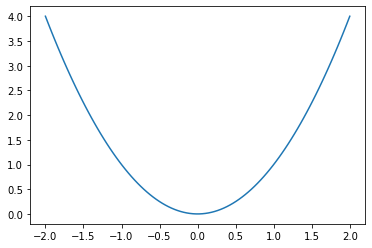

In [11]:
x = np.linspace(-2,2,100)
y = x ** 2
plt.plot(x,y)
plt.show()

The function $f(x) = e^x$ over $\mathbb{R}$ does not have a global minimizer. Indeed, $f(x) > 0$ but no $x$ achieves $0$. And, for any $m > 0$, there is $x$ small enough such that $f(x) < m$. Note that $\mathbb{R}$ is *not* bounded, therefore the *Extreme Value Theorem* does not apply here.

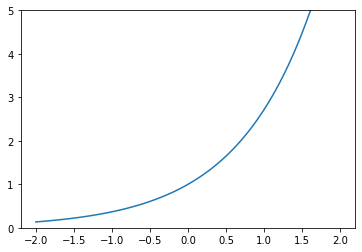

In [12]:
x = np.linspace(-2,2,100)
y = np.exp(x)
plt.plot(x,y)
plt.ylim(0,5)
plt.show()

The function $f(x) = (x+1)^2 (x-1)^2$ over $\mathbb{R}$ has two global minimizers at $x^* = -1$ and $x^{**} = 1$. Indeed, $f(x) \geq 0$ and $f(x) = 0$ if and only $x = x^*$ or $x = x^{**}$.

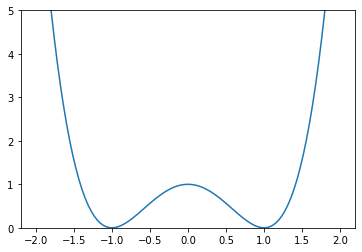

In [13]:
x = np.linspace(-2,2,100)
y = ((x+1)**2) * ((x-1)**2)
plt.plot(x,y)
plt.ylim(0,5)
plt.show()

$\lhd$

In general, finding a global minimizer and certifying that one has been found can be difficult unless some special structure is present. Therefore weaker notions of solution have been introduced.

**Definition (Local Minimizer):** Let $f : \mathbb{R}^d \to \mathbb{R}$. The point $\mathbf{x}^* \in \mathbb{R}^d$ is a local minimizer of $f$ over $\mathbb{R}^d$ if there is $\delta > 0$ such that 

$$
f(\mathbf{x}) 
\geq f(\mathbf{x}^*), \quad \forall \mathbf{x} \in B_{\delta}(\mathbf{x}^*) \setminus \{\mathbf{x}^*\}. 
$$

If the inequality is strict, we say that $\mathbf{x}^*$ is a strict local minimizer. $\lhd$

In words, $\mathbf{x}^*$ is a local minimizer if there is open ball around $\mathbf{x}^*$ where it attains the minimum value. The difference between global and local minimizers is illustrated in the next figure.

![Local minimizer](https://upload.wikimedia.org/wikipedia/commons/thumb/6/68/Extrema_example_original.svg/300px-Extrema_example_original.svg.png)

([Source](https://commons.wikimedia.org/wiki/File:Extrema_example_original.svg))

Local minimizers can be characterized in terms of derivatives (or more generally, gradients, their generalization to functions of several variables; we come back to them later in the course). More precisely, they provide a necessary condition.

***

**Theorem (First-Order Necessary Condition):** Let $f : \mathbb{R} \to \mathbb{R}$ be continuously differentiable on $\mathbb{R}$. If $x_0$ is a local minimizer, then $f'(x_0) = 0$.

***

*Proof:* We argue by contradiction. Suppose that $f'(x_0) \neq 0$. Say $f'(x_0) > 0$ (the other case being similar). By the *Descent Direction Lemma*, there is a $\delta > 0$ such that, for each $x$ in $B_\delta(x_0)$, $f(x) < f(x_0)$ if $x < x_0$. So every open ball around $x_0$ has a point achieving a smaller value than $f(x_0)$. Thus $x_0$ is not a local minimizer, a contradiction. So it must be that $f'(x_0) = 0$. $\square$

### 1.2.3 Probability

Finally, we review a few key definitions and results from probability theory. Further concepts will be reviewed later in the course.

#### 1.2.3.1 Expectation, variance and Chebyshev's inequality

Recall that the [expectation](https://en.wikipedia.org/wiki/Expected_value) (or mean) of a function $h$ of a discrete random variable $X$ taking values in $\mathcal{X}$ is given by

$$
\mathbb{E}[h(X)]
= \sum_{x \in \mathcal{X}} h(x)\,p_X(x)
$$

where $p_X(x) = \mathbb{P}[X = x]$ is the [probability mass function](https://en.wikipedia.org/wiki/Probability_mass_function) (PMF) of $X$.
In the continuous case, we have

$$
\mathbb{E}[h(X)]
= \int h(x) f_X(x)\,\mathrm{d}x
$$

if $f_X$ is the [probability density function](https://en.wikipedia.org/wiki/Probability_density_function) (PDF) of $X$. 

These definitions extend to functions of multiple variables by using instead the joint PMF or PDF. 

We sometimes denote the expectation of $X$ by $\mu_X$.

Two key properties of the expectation are: 

- *linearity*, that is,

$$
\mathbb{E}[\alpha_1 h_1(X) + \alpha_2 h_2(Y) + \beta] = \alpha_1 \,\mathbb{E}[h_1(X)] + \alpha_2 \,\mathbb{E}[h_2(Y)] + \beta
$$

- *monotonicity*, that is, if $h_1(x) \leq h_2(x)$ for all $x$ then

$$
\mathbb{E}[h_1(X)] \leq \mathbb{E}[h_2(X)].
$$

The [variance](https://en.wikipedia.org/wiki/Variance) of a real-valued random variable $X$ is

$$
\mathrm{Var}[X] = \mathbb{E}[(X - \mathbb{E}[X])^2]
$$

and its standard deviation is $\sigma_X = \sqrt{\mathrm{Var}[X]}$. The variance does not satisfy linearity, but we have the following property

$$
\mathrm{Var}[\alpha X + \beta] = \alpha^2 \,\mathrm{Var}[X].
$$

The standard deviation is a measure of the typical deviation of $X$ around its mean, that is, of the spread of the distribution.
A quantitative version of this statement is given by *Chebyshev's inequality*.

***
**Theorem (Chebyshev)** For a random variable $X$ with finite variance, we have for any $\alpha > 0$

$$
\mathbb{P}[|X - \mathbb{E}[X]| \geq \alpha] 
\leq \frac{\mathrm{Var}[X]}{\alpha^2}
= \left(\frac{\sigma_X}{\alpha}\right)^2.
$$
***

The intuition is the following: if the expected squared deviation from the mean is small, then the absolute deviation from the mean is unlikely to be large.

To formalize this we prove a more general inequality, *Makov's inequality*. In words, if a non-negative random variable has a small expectation then it is unlikely to be large.

***
**Lemma (Markov)** Let $Z$ be a non-negative random variable with finite expectation. Then, for any $\beta > 0$,

$$
\mathbb{P}[Z \geq \beta] \leq \frac{\mathbb{E}[Z]}{\beta}.
$$
***

*Proof idea:* The quantity $\beta \,\mathbb{P}[Z \geq \beta]$ is a lower bound on the expectation of $Z$ restricted to the range $\{Z\geq \beta\}$, which by non-negativity is itself lower bounded by $\mathbb{E}[Z]$.

*Proof:* Formally, let $\mathbf{1}_A$ be the indicator of the event $A$, that is, it is the random variable that is $1$ when $A$ occurs and $0$ otherwise. By definition, the expectation of $\mathbf{1}_A$ is 

$$
\mathbb{E}[A] = 0\,\mathbb{P}[\mathbf{1}_A = 0] + 1\,\mathbb{P}[\mathbf{1}_A = 1] = \mathbb{P}[A]
$$
where $A^c$ is the complement of $A$. Hence, by linearity and monotonicity,

$$
\beta \,\mathbb{P}[Z \geq \beta] 
= \beta \,\mathbb{E}[\mathbf{1}_{Z \geq \beta}]
= \mathbb{E}[\beta \mathbf{1}_{Z \geq \beta}]
\leq \mathbb{E}[Z].
$$

Rearranging gives the claim. $\square$

Finally we return to the proof of *Chebyshev*.

*Proof idea (Chebyshev):* Simply apply *Markov* to the squared deviation of $X$ from its mean. 

*Proof (Chebyshev):* Let $Z = (X - \mathbb{E}[X])^2$, which is non-negative by definition. Hence, by *Markov*, for any $\beta = \alpha^2 > 0$

$$
\begin{align*}
\mathbb{P}[|X - \mathbb{E}[X]| \geq \alpha]
&= \mathbb{P}[(X - \mathbb{E}[X])^2 \geq \alpha^2]\\
&= \mathbb{P}[Z \geq \beta]\\
&\leq \frac{\mathbb{E}[Z]}{\beta}\\
&= \frac{\mathrm{Var}[X]}{\alpha^2}
\end{align*}
$$
where we used the definition of the variance in the last equality.$\square$

A few important remarks about *Chebyshev's inequality*:

(1) We sometimes need a one-sided bound of the form

$$
\mathbb{P}[X - \mathbb{E}[X] \geq \alpha].
$$

Note the absence of absolute values compared to the two-sided form appearing in *Chebyshev's inequality*. In this case, we can use the fact that the event $\{X - \mathbb{E}[X] \geq \alpha\}$ implies a fortiori that 
$\{|X - \mathbb{E}[X]| \geq \alpha\}$, so that the probability of the former is smaller than that of the latter by monotonicity, namely,

$$
\mathbb{P}[X - \mathbb{E}[X] \geq \alpha]
\leq \mathbb{P}[|X - \mathbb{E}[X]| \geq \alpha].
$$

We can then use *Chebyshev's inequality* on the right-hand side to obtain

$$
\mathbb{P}[X - \mathbb{E}[X] \geq \alpha]
\leq \frac{\mathrm{Var}[X]}{\alpha^2}.
$$

Similarly, for the same reasons, we also have

$$
\mathbb{P}[X - \mathbb{E}[X] \leq - \alpha]
\leq \frac{\mathrm{Var}[X]}{\alpha^2}.
$$

(2) In terms of the standard deviation $\sigma_X = \sqrt{\mathrm{Var}[X]}$ of $X$, the inequality can be re-written as

$$
\mathbb{P}[|X - \mathbb{E}[X]| \geq \alpha] 
\leq \frac{\mathrm{Var}[X]}{\alpha^2}
= \left(\frac{\sigma_X}{\alpha}\right)^2.
$$

So to get a small bound on the right-hand side, one needs the deviation from the mean $\alpha$ to be significantly larger than the standard deviation. In words, a random variable is unlikely to be away from its mean by much more than its standard deviation. This observation is consistent with the interpretation of the standard deviation as the typical spread of a random variable.

*Chebyshev's inequality* is particularly useful when combined with independence, as we recall next.

#### 1.2.3.2 Independence and limit theorems

Recall that discrete random variables $X$ and $Y$ are independent if their joint PMF factorizes, that is

$$
p_{X,Y}(x,y) = p_X(x) \,p_Y(y), \qquad \forall x, y
$$

where $p_{X,Y}(x,y) = \mathbb{P}[X=x, Y=y]$. Similarly, continuous random variables $X$ and $Y$ are independent if their joint PDF factorizes. One consequence is that expectations of products of single-variable functions factorize as well, that is, for functions $g$ and $h$ we have

$$
\mathbb{E}[g(X) h(Y)]
= \mathbb{E}[g(X)] \,\mathbb{E}[h(Y)],
$$

provided the expectations exist.

An important way to quantify the lack of independence of two random variables is the covariance.

**Definition (Covariance)** The covariance of random variables $X$ and $Y$ with finite means and variances is defined as

$$
\mathrm{Cov}[X,Y]
= \mathbb{E}\left[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])\right].
$$

$\lhd$

Note that, by definition, the covariance is symmetric: $\mathrm{Cov}[X,Y] = \mathrm{Cov}[Y,X]$.

When $X$ and $Y$ are independent, their covariance is $0$:

$$
\begin{align*}
\mathrm{Cov}[X,Y]
&= \mathbb{E}\left[(X - \mathbb{E}[X])(Y - \mathbb{E}[Y])\right]\\
&= \mathbb{E}\left[X - \mathbb{E}[X]\right]\mathbb{E}\left[Y - \mathbb{E}[Y]\right]\\
&= \left(\mathbb{E}[X] - \mathbb{E}[X]\right)\left(\mathbb{E}[Y] - \mathbb{E}[Y]\right)\\
&= 0,
\end{align*}
$$

where we used independence on the second line and the linearity of expectations on the third one.

The covariance leads to a useful identity for the variance of a sum of random variables.

***

**Lemma (Variance of a Sum)** Let $X_1,\ldots,X_n$ be random variables with finite means and variances. Then we have

$$
\mathrm{Var}[X_1 + \cdots + X_n]
= \sum_{i=1} \mathrm{Var}[X_i] + 2 \sum_{i < j} \mathrm{Cov}[X_i, X_j].
$$

***

*Proof:* By definition of the variance and linearity of expectations,

$$
\begin{align*}
\mathrm{Var}[X_1 + \cdots + X_n]
&= \mathbb{E}\left[(X_1 + \cdots + X_n - \mathbb{E}[X_1 + \cdots + X_n])^2\right]\\
&= \mathbb{E}\left[(X_1 + \cdots + X_n - \mathbb{E}[X_1] - \cdots - \mathbb{E}[X_n])^2\right]\\
&= \mathbb{E}\left[(X_1 - \mathbb{E}[X_1]) + \cdots + (X_n  - \mathbb{E}[X_n]))^2\right]\\
&= \sum_{i=1}^n \mathbb{E}\left[(X_i - \mathbb{E}[X_i])^2\right] 
+ \sum_{i \neq j} \mathbb{E}\left[(X_i - \mathbb{E}[X_i]) (X_j - \mathbb{E}[X_j])\right].
\end{align*}
$$

The claim follows from the definition of the variance and covariance, and the symmetry of the covariance. $\square$

The previous lemma has the following important implication. If $X_1, \ldots, X_n$ are pairwise independent, real-valued random variables, then

$$
\mathrm{Var}[X_1 + \cdots + X_n]
= \mathrm{Var}[X_1] + \cdots + \mathrm{Var}[X_n].
$$

Notice that, unlike the case of the expectation, this linearity property for the variance requires independence.

Applied to the sample mean of $n$ independent, identically distributed (i.i.d.) random variables $X_1,\ldots,X_n$, we obtain

$$
\begin{align*}
\mathrm{Var}
\left[\frac{1}{n} \sum_{i=1}^n X_i\right]
&= \frac{1}{n^2} \sum_{i=1}^n \mathrm{Var}[X_i]\\
&= \frac{1}{n^2} n \,\mathrm{Var}[X_1]\\
&= \frac{\mathrm{Var}[X_1]}{n}.
\end{align*}
$$

So the variance of the sample mean decreases as $n$ gets large, while its expectation remains the same by linearity

$$
\begin{align*}
\mathbb{E}
\left[\frac{1}{n} \sum_{i=1}^n X_i\right]
&= \frac{1}{n} \sum_{i=1}^n \mathbb{E}[X_i]\\
&= \frac{1}{n} n \,\mathbb{E}[X_1]\\
&= \mathbb{E}[X_1].
\end{align*}
$$

Together with *Chebyshev's inequality*, we immediately get that the sample mean approaches its expectation in the following probabilistic sense.

***
**Theorem (Weak Law of Large Numbers)** Let $X_1, \ldots, X_n$ be i.i.d. For any $\varepsilon > 0$, as $n \to +\infty$,

$$
\mathbb{P}\left[\left|\frac{1}{n} \sum_{i=1}^n X_i 
- \mathbb{E}[X_1]\right| \geq \varepsilon\right]
\to 0.
$$
***

*Proof:* By *Chebyshev* and the formulas above,

$$
\begin{align*}
\mathbb{P}\left[\left|\frac{1}{n} \sum_{i=1}^n X_i 
- \mathbb{E}[X_1]\right| \geq \varepsilon\right]
&= \mathbb{P}\left[\left|\frac{1}{n} \sum_{i=1}^n X_i 
- \mathbb{E} \left[\frac{1}{n} \sum_{i=1}^n X_i\right]\right| \geq \varepsilon\right]\\
&\leq \frac{\mathrm{Var}\left[\frac{1}{n} \sum_{i=1}^n X_i\right]}{\varepsilon^2}\\
&= \frac{\mathrm{Var}[X_1]}{n \varepsilon^2}\\
&\to 0
\end{align*}
$$

as $n \to +\infty$. $\square$

**NUMERICAL CORNER:** We can use simulations to confirm the *Weak Law of Large Numbers*. Recall that a uniform random variable over the interval $[a,b]$ has density

$$
f_{X}(x)
= \begin{cases}
\frac{1}{b-a} & x \in [a,b] \\
0 & \text{o.w.}
\end{cases}
$$

We write $X \sim \mathrm{U}[a,b]$. We can obtain a sample from $\mathrm{U}[0,1]$ by using the function [`numpy.random`](https://numpy.org/doc/stable/reference/random/generator.html) in Numpy.  

In [14]:
from numpy.random import default_rng
rng = default_rng(12345)

In [15]:
rng.random()

0.22733602246716966

Now we take $n$ samples from $\mathrm{U}[0,1]$ and compute their sample mean. We repeat $k$ times and display the empirical distribution of the sample means using an [histogram](https://en.wikipedia.org/wiki/Histogram).

In [16]:
def lln_unif(n, k):
    sample_mean = [np.mean(rng.random(n)) for i in range(k)]
    plt.hist(sample_mean,bins=15)
    plt.xlim(0,1)
    plt.title(f'n={n}')
    plt.show()

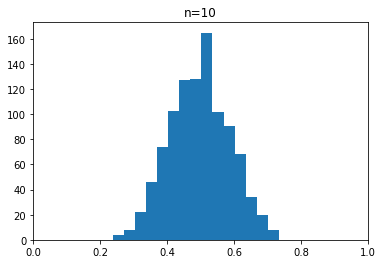

In [17]:
lln_unif(10, 1000)

Taking $n$ much larger leads to more concentration around the mean.

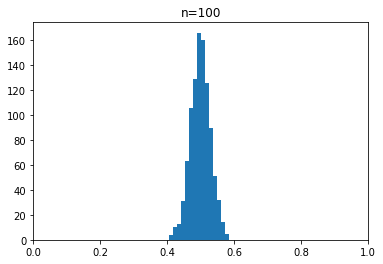

In [18]:
lln_unif(100, 1000)

$\lhd$

#### 1.2.3.3 Normal distribution

Recall that a standard Normal variable $X$ has PDF

$$
f_X(x) 
= \frac{1}{\sqrt{2 \pi}}
\exp\left(
- x^2/2
\right).
$$

Its mean is $0$ and its variance is $1$. 

This is what its PDF looks like:

![Normal PDF](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Standard_Normal_Distribution.png/640px-Standard_Normal_Distribution.png)

([Source](https://upload.wikimedia.org/wikipedia/commons/thumb/4/44/Standard_Normal_Distribution.png/1599px-Standard_Normal_Distribution.png))

To construct a $d$-dimensional version, we take $d$ independent standard Normal variables $X_1, X_2, \ldots, X_d$ and form the vector $\mathbf{X} = (X_1,\ldots,X_d)$. We will say that $\mathbf{X}$ is a standard Normal $d$-vector. By independence, its joint PDF is given by the product of the PDFs of the $X_i$'s, that is,

$$
\begin{align*}
f_{\mathbf{X}}(\mathbf{x})
&= \prod_{i=1}^d \frac{1}{\sqrt{2 \pi}}
\exp\left(
- x_i^2/2
\right)\\
&= \frac{1}{\prod_{i=1}^d \sqrt{2 \pi}}
\exp\left(
- \sum_{i=1}^d x_i^2/2
\right)\\
&= \frac{1}{(2 \pi)^{d/2}} 
\exp(-\|\mathbf{x}\|^2/2).
\end{align*}
$$

We can also shift and scale it.

**Definition (Spherical Gaussian):** Let $\mathbf{Z}$ be a standard Normal $d$-vector,
let $\boldsymbol{\mu} \in \mathbb{R}^d$ and let $\sigma \in \mathbb{R}_+$. Then we will refer to the transformed random variable $\mathbf{X} = \boldsymbol{\mu} + \sigma \mathbf{Z}$ as a spherical Gaussian with mean $\boldsymbol{\mu}$ and variance $\sigma^2$. We use the notation $\mathbf{Z} \sim N_d(\boldsymbol{\mu}, \sigma^2 I)$. $\lhd$

**NUMERICAL CORNER:** The following function generates $n$ data points from a spherical $d$-dimensional Gaussians with variance $1$ and mean $w \mathbf{e}_1$. We will use it later in the chapter to simulate interesting datasets. 

Below, `rng.normal(0,1,d)` generates a `d`-dimensional spherical Gaussian with mean $\mathbf{0}$. Below we use the function [`numpy.concatenate`](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) to create a vector by concatenating two given vectors. We use `[w]` to create a vector with a single entry `w`. We also use the function [`numpy.zeros`](https://numpy.org/doc/stable/reference/generated/numpy.zeros.html) to create an all-zero vector. 

In [19]:
def one_cluster(d, n, w):
    X = np.stack([np.concatenate(([w], np.zeros(d-1))) + rng.normal(0,1,d) for _ in range(n)])
    return X

We generate $100$ data points in dimension $d=2$.

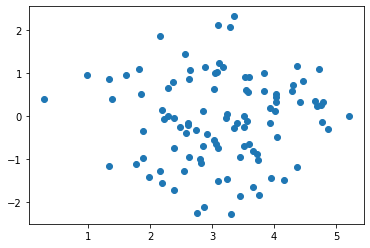

In [20]:
d, n, w = 2, 100, 3.
X = one_cluster(d, n, w)
plt.scatter(X[:,0], X[:,1])
plt.show()